After loading and installing all libraries and packages, I will now laod the data

In [ ]:
import pandas as pd

# Load your dataset
df = pd.read_csv('covid_19_clean_complete.csv')

# Peek at the data
print(df.head())
print(df.info())
print(df.describe())

# Check for missing values
print(df.isnull().sum())


  Province/State Country/Region       Lat       Long        Date  Confirmed  \
0            NaN    Afghanistan  33.93911  67.709953  2020-01-22          0   
1            NaN        Albania  41.15330  20.168300  2020-01-22          0   
2            NaN        Algeria  28.03390   1.659600  2020-01-22          0   
3            NaN        Andorra  42.50630   1.521800  2020-01-22          0   
4            NaN         Angola -11.20270  17.873900  2020-01-22          0   

   Deaths  Recovered  Active             WHO Region  
0       0          0       0  Eastern Mediterranean  
1       0          0       0                 Europe  
2       0          0       0                 Africa  
3       0          0       0                 Europe  
4       0          0       0                 Africa  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49068 entries, 0 to 49067
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0

My next step is to Clean Up the Data by filling up missing values.
After looking at the data, I would like to Convert Date column to datetime

In [29]:

df['Date'] = pd.to_datetime(df['Date'])

# Fill missing values (optional)
df['Recovered'] = df['Recovered'].fillna(0)


Using Matplotlib, I would like to visualzie
-- Confirmed Cases Over Time (Globally)
-- Plot for a Specific Country (e.g., Ghana)

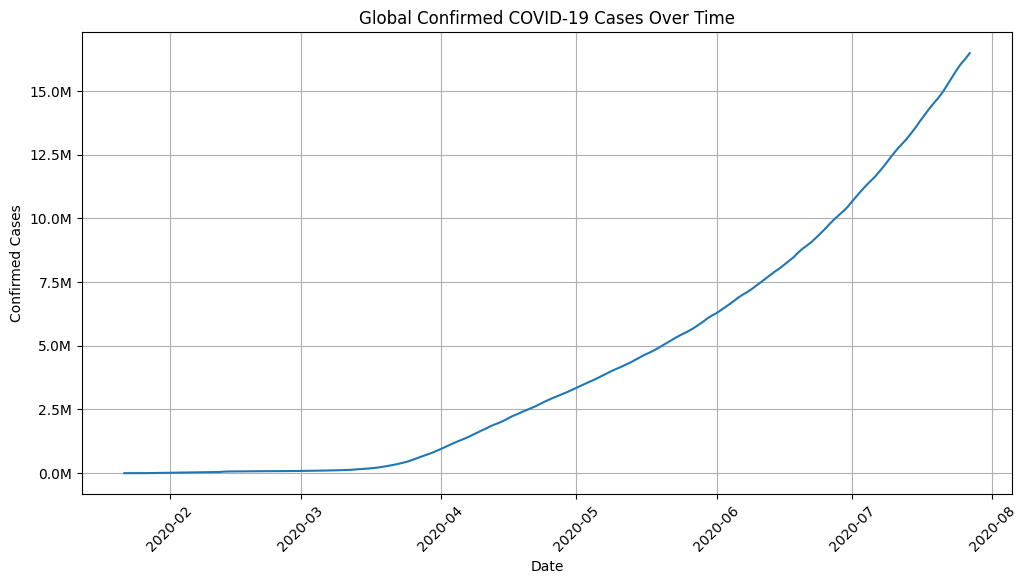

In [51]:
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick  # import the ticker module

# Group by Date and sum cases
global_cases = df.groupby('Date')['Confirmed'].sum()

# Plot
plt.figure(figsize=(12,6))
plt.plot(global_cases.index, global_cases.values)

plt.title('Global Confirmed COVID-19 Cases Over Time')
plt.xlabel('Date')
plt.ylabel('Confirmed Cases')

plt.xticks(rotation=45)
plt.grid()

# Add the Y-axis formatter to display numbers in Millions
formatter = mtick.FuncFormatter(lambda x, _: f'{x/1_000_000:.1f}M')  # 1 decimal place
plt.gca().yaxis.set_major_formatter(formatter)

plt.show()


C:\TEMP\ipykernel_15156\1954562923.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_countries.values, y=top_countries.index, palette="Reds_r")


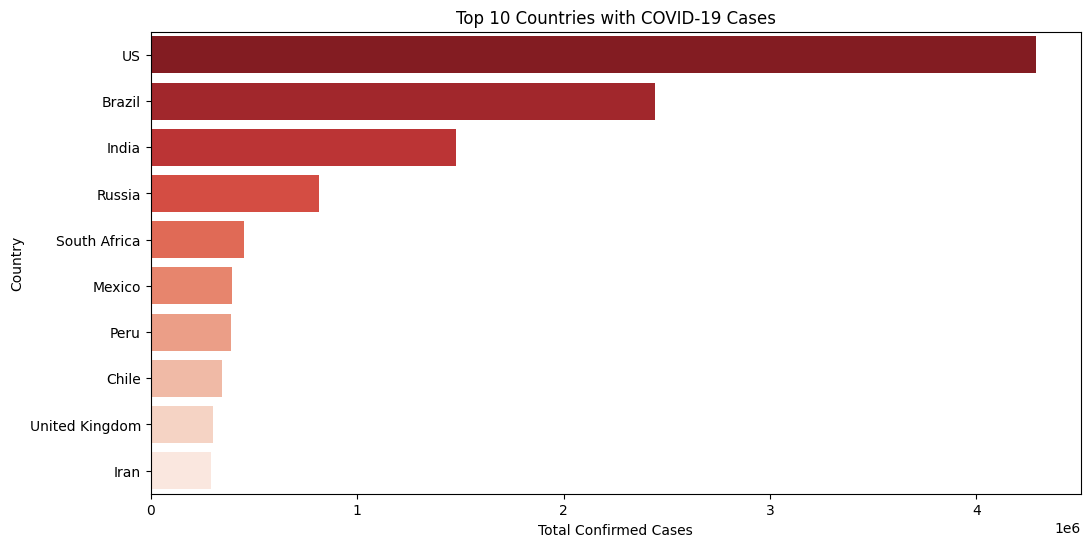

In [42]:
import seaborn as sns

# Get the latest date's data
latest_date = df["Date"].max()
latest_data = df[df["Date"] == latest_date]

# Group by Country and sum Confirmed cases
top_countries = latest_data.groupby("Country/Region")["Confirmed"].sum().nlargest(10)

# Plot
plt.figure(figsize=(12, 6))
sns.barplot(x=top_countries.values, y=top_countries.index, palette="Reds_r")
plt.xlabel("Total Confirmed Cases")
plt.ylabel("Country")
plt.title("Top 10 Countries with COVID-19 Cases")
plt.show()


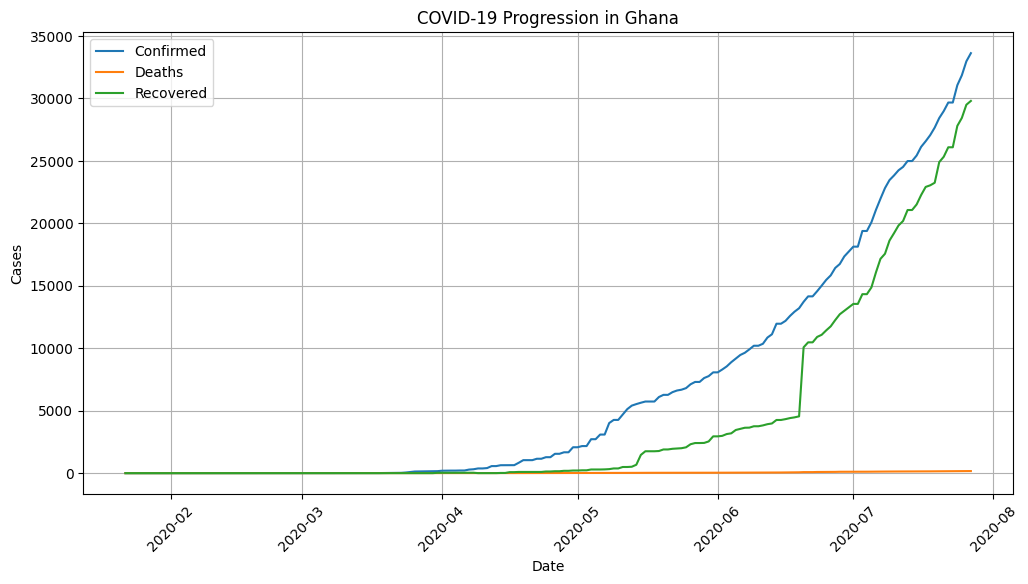

In [50]:
country = 'Ghana'
ghana_data = df[df['Country/Region'] == country]

plt.figure(figsize=(12,6))
plt.plot(ghana_data['Date'], ghana_data['Confirmed'], label='Confirmed')
plt.plot(ghana_data['Date'], ghana_data['Deaths'], label='Deaths')
plt.plot(ghana_data['Date'], ghana_data['Recovered'], label='Recovered')
plt.title(f'COVID-19 Progression in {country}')
plt.xlabel('Date')
plt.ylabel('Cases')
plt.legend()
plt.xticks(rotation=45)
plt.grid()
plt.show()


In [48]:
df = pd.read_csv('covid_19_clean_complete.csv')
df['Date'] = pd.to_datetime(df['Date'])


In [49]:
df['New Confirmed'] = df.groupby('Country/Region')['Confirmed'].diff().fillna(0)


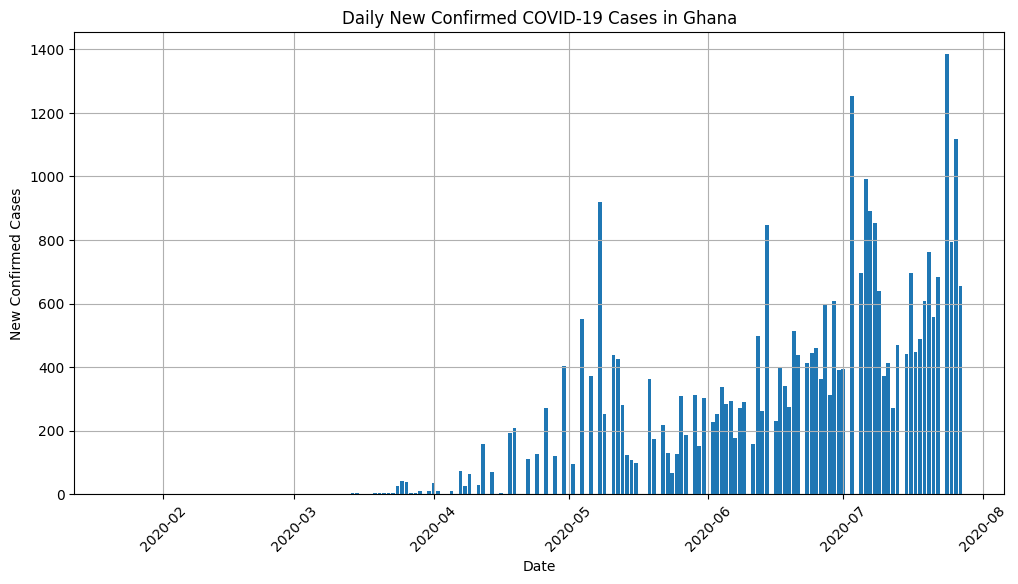

In [47]:
import pandas as pd
import matplotlib.pyplot as plt

# Load dataset
df = pd.read_csv('covid_19_clean_complete.csv')
df['Date'] = pd.to_datetime(df['Date'])

# Calculate New Confirmed Cases per Country
df['New Confirmed'] = df.groupby('Country/Region')['Confirmed'].diff().fillna(0)

# Pick a country to visualize (say, Ghana)
country = 'Ghana'
country_data = df[df['Country/Region'] == country]

# Plot daily new confirmed cases for the country
plt.figure(figsize=(12,6))
plt.bar(country_data['Date'], country_data['New Confirmed'])

plt.title(f'Daily New Confirmed COVID-19 Cases in {country}')
plt.xlabel('Date')
plt.ylabel('New Confirmed Cases')
plt.xticks(rotation=45)
plt.grid()

plt.show()


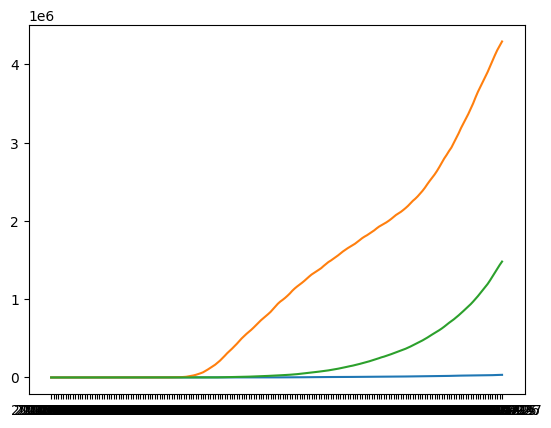

In [44]:
countries = ['Ghana', 'US', 'India']
for country in countries:
    data = df[df['Country/Region'] == country]
    plt.plot(data['Date'], data['Confirmed'], label=country)
